# Linear Regression on Kaggle Competition for House Prices

Data from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)
This code is from several GitHub repositories (Krish Naik, Sudhir Kumar)

Clase: https://www.youtube.com/watch?v=OTg6BzBQNGI&ab_channel=Dr.ArrigoCoen


In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 
from sklearn import metrics

# to add plots to your Jupyter notebook we use the next command
# %matplotlib inline 
pd.set_option('display.max_rows', 90) # by default is 10, if change to None print ALL
pd.set_option('display.max_columns', 90) # by default is 10, if change to None print ALL

## 1. Import Data

**Es importante que modifiquen la variable ```team_members``` con respecto a los miembros del equipo que tengan.**

In [2]:
# read the data into a pandas dataFrame
df=pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
# read the data into a pandas dataFrame
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

# El siguiente diccionario contiene los nombres y números de cuenta de cada miempbro del equipo
team_members = {"Arrigo Coen Coria":308025413, "Miriam Gabriela Colín Nuñez":308325413} 
if len(team_members)>3:
    print("El máximo número de miembros de un equipo es tres, favor de corregirlo.")

# Fixing the seeds
np.random.seed(sum(team_members.values()))
random.seed(sum(team_members.values()))

columns_to_work_with = random.choices(list(df.columns[1:80]),k=5)

df = df[columns_to_work_with + ['SalePrice']]

#### Obsevaciones
 1. Recuerden cambiar la variable ```team_members```.

## 2. Exploratory Analysis

In [4]:
# See some values of the data
df.head()

,BsmtFinSF1,LandContour,LotArea,Street,GarageQual,SalePrice
0,706,Lvl,8450,Pave,TA,208500
1,978,Lvl,9600,Pave,TA,181500
2,486,Lvl,11250,Pave,TA,223500
3,216,Lvl,9550,Pave,TA,140000
4,655,Lvl,14260,Pave,TA,250000


In [5]:
# The dimensions of the data
df.shape

(1460, 6)

Podemos ver que tenemos las siguientes variables:
 - BsmtFinSF1  = Type 1 finished square feet	
 - LandContour = Flatness of the property
       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
 - LotArea	   = Lot size in square feet
 - Street	   = Type of road access to property
       Grvl	Gravel	
       Pave	Paved
 - GarageQual  = Garage quality
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
 - SalePrice   = Price at sale
 
 Ahora veamos de que tipos son y si tienen valores nulos

In [6]:
# To find the type and the number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtFinSF1   1460 non-null   int64 
 1   LandContour  1460 non-null   object
 2   LotArea      1460 non-null   int64 
 3   Street       1460 non-null   object
 4   GarageQual   1379 non-null   object
 5   SalePrice    1460 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 68.6+ KB


In [7]:
# Number of null values per column
df.isnull().sum()

BsmtFinSF1      0
LandContour     0
LotArea         0
Street          0
GarageQual     81
SalePrice       0
dtype: int64

### Observaciones de las columnas elegidas

La columna `GarageQual` tienen vacios. Como esta columna es categórica vamos a rellenar los ceros que tiene con la moda de esa columna. Si fuera el caso de que la columna fuera numérica (quizá) sería mejor utilizar la media para rellenar estos valores faltantes

In [8]:
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])

In [9]:
# Lets plot the UPDATED null values of the data
df.isnull().sum()

BsmtFinSF1     0
LandContour    0
LotArea        0
Street         0
GarageQual     0
SalePrice      0
dtype: int64

**Ahora todas las columnas están llenas. Pero necesitamos transformar los valores categóricos en valores numéricos para poder usar regresión lineal.**

#### Observaciones
 1. Es importante ver que variables se van a estudiar y que contienen
 2. Revisar el tipo de variables
 3. Revisar si existen valores nulos y pensar que hacer con ellos

# 3. Data visualization
Ahora exploraremos las variables una por una para comprenderlas mejor y codificarlas correctamente 

### Analysis of BsmtFinSF1

This variable represents the type 1 finished square feet of the houses.

Text(0, 0.5, 'Frequency')

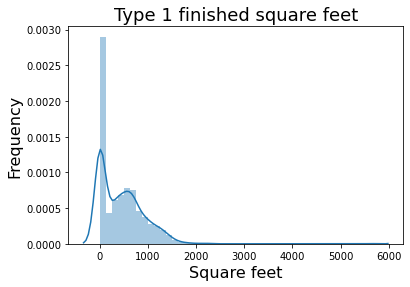

In [10]:
sns.distplot(df.BsmtFinSF1)
plt.title('Type 1 finished square feet', fontsize=18)
plt.xlabel('Square feet', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

### Analysis of LandContour 
Flatness of the property
- Lvl = Near Flat/Level	
- Bnk = Banked - Quick and significant rise from street grade to building
- HLS = Hillside - Significant slope from side to side

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


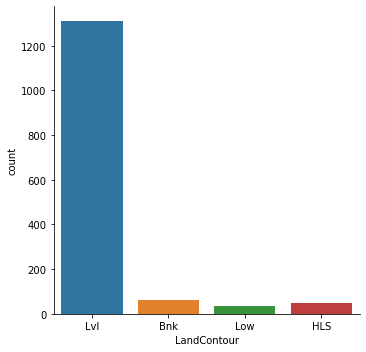

In [11]:
# Values in each cathegory
print(df['LandContour'].value_counts(dropna=False))
sns.catplot(x='LandContour', kind='count', data=df) 

In [12]:
# One-Hot encoder
dum_LandContour = pd.get_dummies(df.LandContour, prefix='LandContour', drop_first=True)
dum_LandContour.head()

,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


### Analysis of LotArea	 
Lot size in square feet

Text(0, 0.5, 'Frequency')

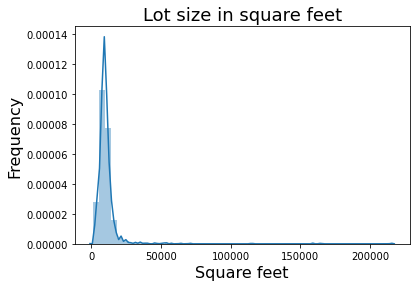

In [13]:
# Histogram
sns.distplot(df.LotArea)
plt.title('Lot size in square feet', fontsize=18)
plt.xlabel('Square feet', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

### Analysis of Street
Type of road access to property
 - Grvl	Gravel	
 - Pave Paved

Pave    1454
Grvl       6
Name: Street, dtype: int64


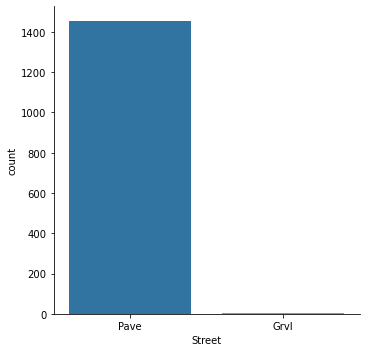

In [14]:
# Values in each cathegory
print(df['Street'].value_counts(dropna=False))
sns.catplot(x='Street', kind='count', data=df) 

In [15]:
# One-Hot encoder
dum_Street = pd.get_dummies(df.Street, prefix='Street', drop_first=True)
dum_Street.head()

,Street_Pave
0,1
1,1
2,1
3,1
4,1


### Analysis of GarageQual 

Garage quality
- Ex = Excellent
- Gd = Good
- TA = Typical/Average
- Fa = Fair
- Po = Poor
- NA = No Garage

TA    1392
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


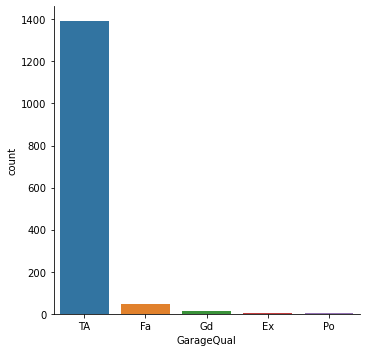

In [16]:
# Values in each cathegory
print(df['GarageQual'].value_counts(dropna=False))
sns.catplot(x='GarageQual', kind='count', data=df) 

In [17]:
# category ordering (within each feature) is defined by you
oe = OrdinalEncoder(categories=[['Ex','Gd','TA','Fa','Po','NA']])
dum_GarageQual = pd.DataFrame(oe.fit_transform(df[['GarageQual']]))
dum_GarageQual.columns =['GarageQual_numeric']
dum_GarageQual.head()

,GarageQual_numeric
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


### Analysis of SalePrice  
Price at sale

Text(0, 0.5, 'Frequency')

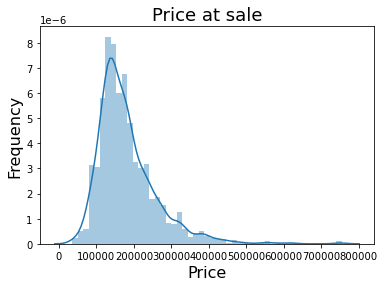

In [18]:
# Histogram
sns.distplot(df.SalePrice)
plt.title('Price at sale', fontsize=18)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

### Transformation of the variables
In this section we transform the variables into a only numeric data frame.

In [19]:
final_df=pd.concat([df.BsmtFinSF1,dum_LandContour,df.LotArea,dum_Street,dum_GarageQual,df.SalePrice],axis=1)
final_df.head()

,BsmtFinSF1,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotArea,Street_Pave,GarageQual_numeric,SalePrice
0,706,0,0,1,8450,1,2.0,208500
1,978,0,0,1,9600,1,2.0,181500
2,486,0,0,1,11250,1,2.0,223500
3,216,0,0,1,9550,1,2.0,140000
4,655,0,0,1,14260,1,2.0,250000


In [20]:
final_df.describe()

,BsmtFinSF1,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotArea,Street_Pave,GarageQual_numeric,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,443.639726,0.034247,0.024658,0.897945,10516.828082,0.995890,2.023288,180921.195890
std,456.098091,0.181924,0.155132,0.302824,9981.264932,0.063996,0.241665,79442.502883
min,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,34900.000000
25%,0.000000,0.000000,0.000000,1.000000,7553.500000,1.000000,2.000000,129975.000000
50%,383.500000,0.000000,0.000000,1.000000,9478.500000,1.000000,2.000000,163000.000000
75%,712.250000,0.000000,0.000000,1.000000,11601.500000,1.000000,2.000000,214000.000000
max,5644.000000,1.000000,1.000000,1.000000,215245.000000,1.000000,4.000000,755000.000000


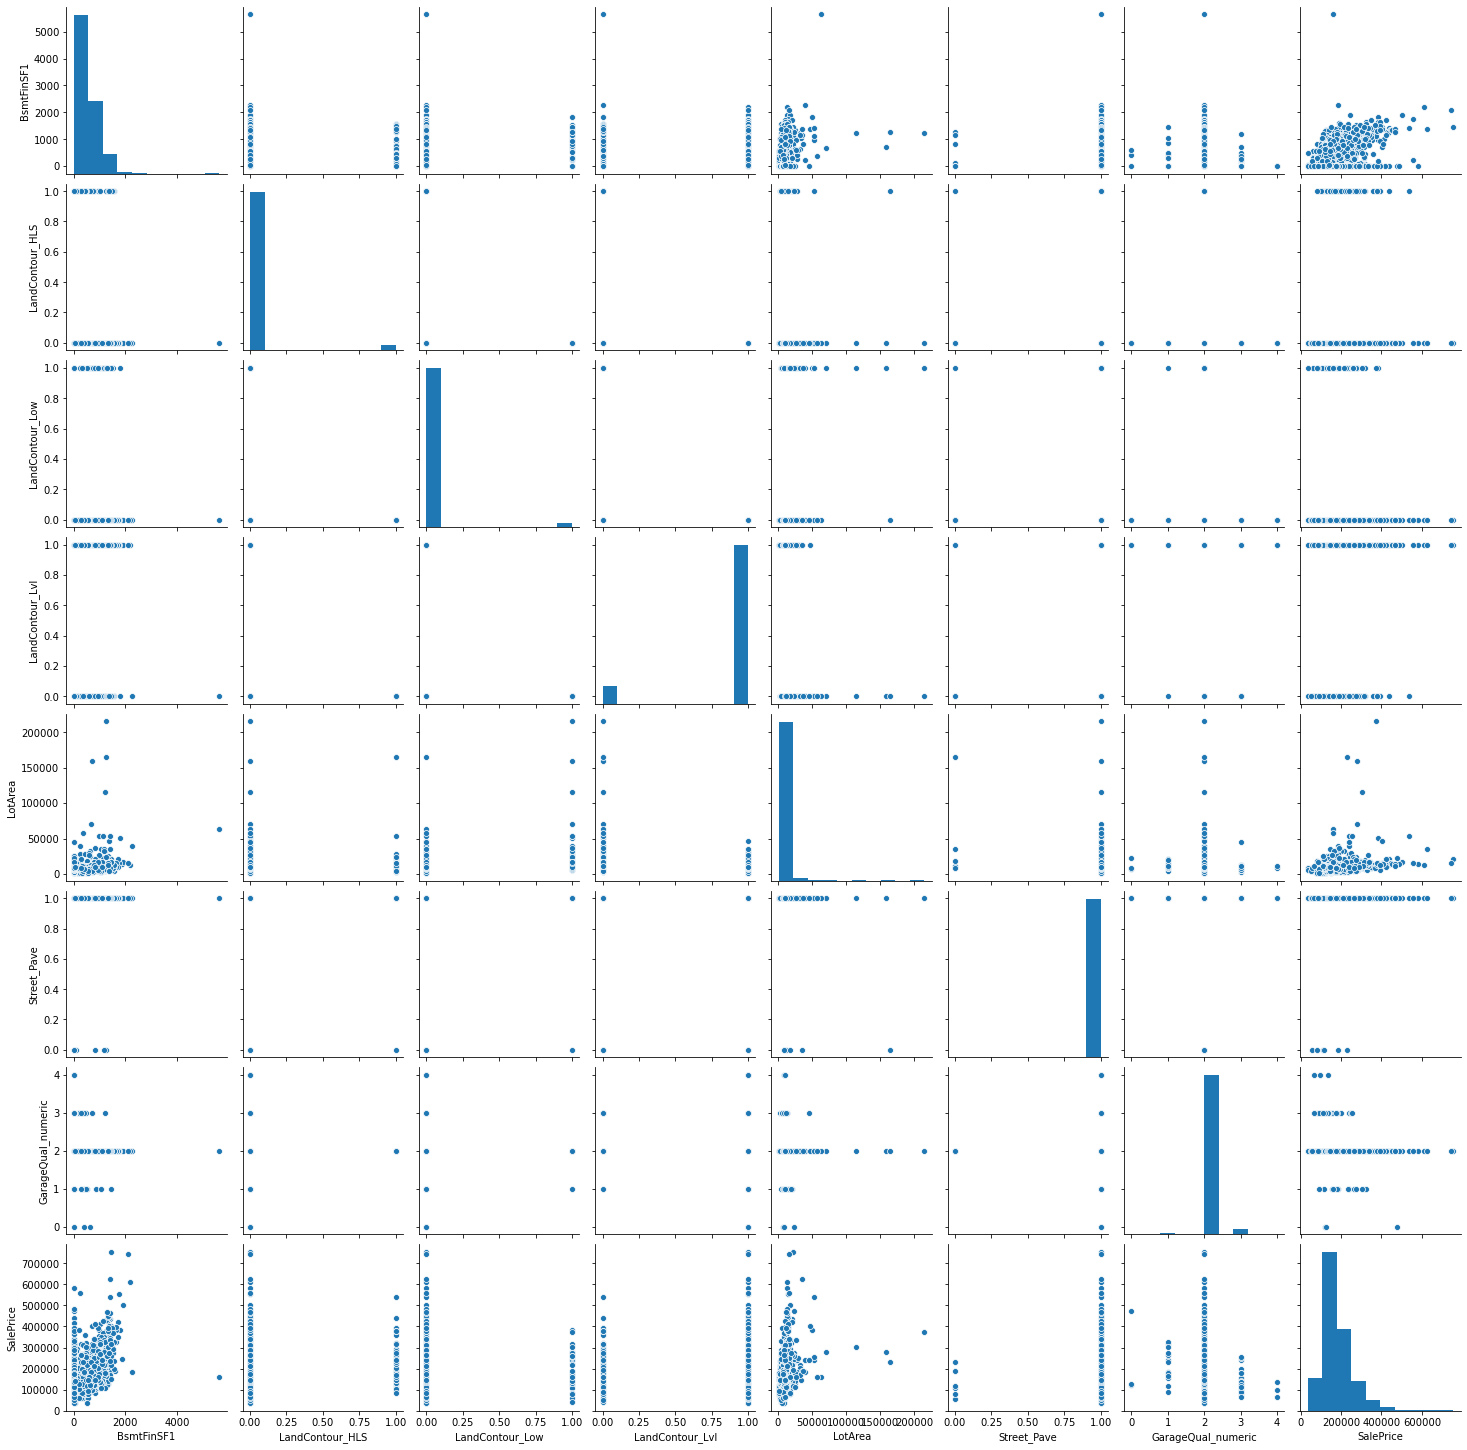

In [21]:
sns.pairplot(final_df)

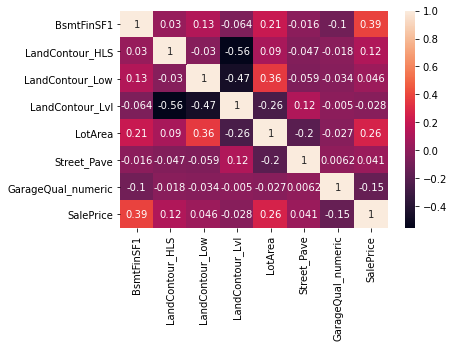

In [22]:
sns.heatmap(final_df.corr(), annot=True)

#### Observaciones
 1. Es importante graficar las variables una-por-una y dos-a-dos
 2. Variables categóricas-ordenadas se recomienda transformar usando ```OrdinalEncoder```
 3. Variables categóricas-no-ordenadas se recomienda transformar usando ```pd.get_dummies```
 4. Una vez transformadas las observaciones a valores numéricos se recomienda utilizar ```sns.pairplot``` y ```sns.heatmap```
  

# 4. Spliting data into training and testing

In [23]:
X = final_df[['BsmtFinSF1', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl','LotArea', 'Street_Pave', 'GarageQual_numeric']]
y = final_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=sum(team_members.values())) 


# 5. Building a ML model

In [24]:
lm = LinearRegression() 
lm.fit(X_train,y_train) 

LinearRegression()

In [25]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

                      Coefficient
BsmtFinSF1              46.722423
LandContour_HLS      70314.862176
LandContour_Low      -1342.198988
LandContour_Lvl      41385.143953
LotArea                  2.474204
Street_Pave         130849.439190
GarageQual_numeric  -38421.403290


# 5. Predictions bythe model

In [26]:
predictions = lm.predict(X_test)  

# 6. Model evaluation

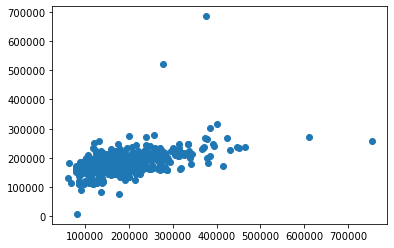

In [27]:
plt.scatter(y_test,predictions)

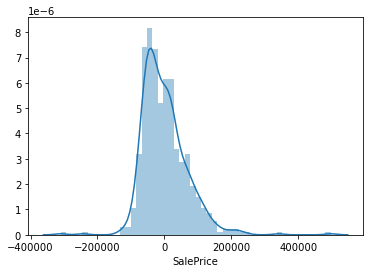

In [28]:
sns.distplot((y_test-predictions),bins=50); 

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 49844.0184319854
MSE: 4512600939.23735
RMSE: 67175.89552240707


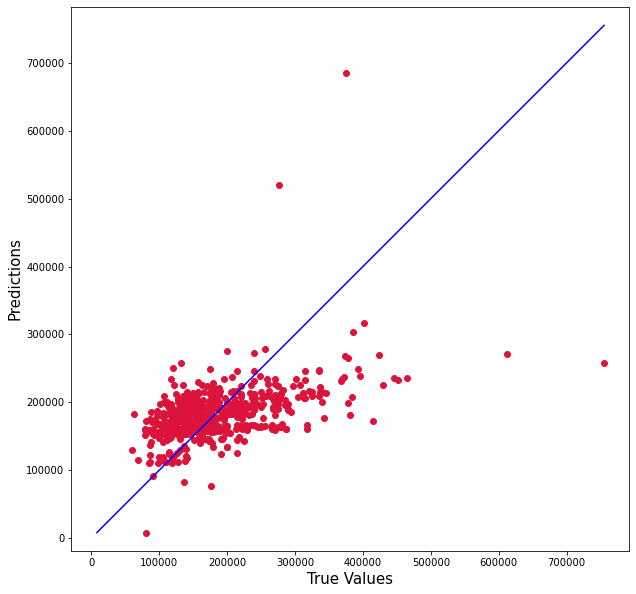

In [30]:
true_value = y_test
predicted_value = predictions

plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
ohe = OneHotEncoder()
imp = SimpleImputer()

'LandContour' 'Street' 'GarageQual'

ct = make_column_transformer(
    (ohe, ['LandContour', 'Street', 'GarageQual']),  # apply OneHotEncoder to this columns
    (imp, []),              # apply SimpleImputer to this columns
    remainder='passthrough')     # include remaining column (Fare) in the output


# column order: Embarked (3 columns), Sex (2 columns), Age (1 column), Fare (1 column)
df = pd.DataFrame(ct.fit_transform(df))

In [ ]:
df.head()

In [ ]:
df.columns
df['MSZoning'].value_counts()
print(df['MSZoning'].dtypes=='object')

df['MSZoning'].isnull().sum()

In [ ]:
df.dtypes.unique()

In [ ]:
for i,col in enumerate(df.columns):
    if  df[col].dtypes!='O':
        print(' --- ' + str(i) +' Column name "' + col + '" ---')
        print('Number of NaN = ' + str(df[col].isnull().sum()))
        print('Add to cols_float')
        print(df[col].dtypes)
        cols_no_O.append(col)

In [ ]:
cols_no_O = []

for i,col in enumerate(df.columns):
    if  df[col].dtypes!='O' and df[col].isnull().sum()==0 and col!='Id' and col!='SalePrice':
        print(' --- ' + str(i) +' Column name "' + col + '" ---')
        print('Number of NaN = ' + str(df[col].isnull().sum()))
        print('Add to cols_float')
        print(df[col].dtypes)
        cols_no_O.append(col)


print(cols_no_O)

X = df[cols_no_O]
y = df['SalePrice']
print(len(cols_no_O))

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

lm = LinearRegression() 

lm.fit(X_train,y_train) 

In [ ]:
predictions = lm.predict(X_test)  

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
sns.distplot((y_test-predictions),bins=50); 

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

In [ ]:
cols_no_O

In [ ]:
RealData_test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [ ]:
RealData_test.head()

In [ ]:
x_test_real.isnull().sum()

In [ ]:
x_test_real = RealData_test[cols_no_O]
x_test_real.head()

In [ ]:
y_test_real = lm.predict(x_test_real)  

In [ ]:

y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))

X_kaggle

real_predictions = lm.predict()  

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

In [ ]:
cols_float = []

for i,col in enumerate(df.columns):
    print(' --- ' + str(i) +' Column name "' + col + '" ---')
    print('Number of NaN = ' + str(df[col].isnull().sum()))
    
    if df[col].dtypes=='float64' and df[col].isnull().sum()==0:
        print('Add to cols_float')
        cols_float.append(col)
    # Numeric column with NaN
    if df[col].dtypes=='int64' and df[col].isnull().sum()>0:
        print("--------------------------Is int64 and has NaNs")
        next
    if df[col].dtypes=='float64' and df[col].isnull().sum()>0:
        print("--------------------------Is float64 and has NaNs")
        next
    if df[col].dtypes=='O' and df[col].isnull().sum()>0:
        print("--------------------------Is O and has NaNs")
        next
    if df[col].dtypes=='object':
        print(df[col].value_counts(dropna=False))
#         print(df[col].value_counts(dropna=False))
    if df[col].dtypes=='int64':
        print('---This is an int64')

In [ ]:
for i,col in enumerate(df.columns):
    print(' --- ' + str(i) +' Column name "' + col + '" ---')
    print('Number of NaN = ' + str(df[col].isnull().sum()))
    
    # Numeric column with NaN
    if df[col].dtypes!='object' and df[col].isnull().sum()>0:
        print
    
    if df[col].dtypes=='object':
        print(df[col].value_counts(dropna=False))
#         print(df[col].value_counts(dropna=False))
    if df[col].dtypes=='int64':
        print('----------------------------This is an int64')

In [ ]:
# Under the previous results, we need to transfor some data values
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

Usefull links:
 - To control the print of pandas data frame [here](https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/)
 - Value counts [here](https://re-thought.com/pandas-value_counts/)
 - Jupyter keyboard shortcuts [here](https://www.freetechtrainer.com/keyboard-shortcuts-for-jupyter-notebook/)

### Other useful commands
 - HouseDF.describe()

In [ ]:
df['MSZoning'].value_counts()

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [ ]:
df.drop(['Alley'],axis=1,inplace=True)

In [ ]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [ ]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [ ]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [ ]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [ ]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [ ]:
df.shape

In [ ]:
df.drop(['Id'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [ ]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
##HAndle Categorical Features

In [ ]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
len(columns)

In [ ]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [ ]:
main_df=df.copy()

In [ ]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [ ]:
test_df.shape

In [ ]:
test_df.head()

In [ ]:
final_df=pd.concat([df,test_df],axis=0)

In [ ]:
final_df['SalePrice']

In [ ]:
final_df.shape

In [ ]:
final_df=category_onehot_multcols(columns)

In [ ]:
final_df.shape

In [ ]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.shape

In [ ]:
final_df

In [ ]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [ ]:
df_Train.head()

In [ ]:
df_Test.head()

In [ ]:
df_Train.shape

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


## Prediciton and selecting the Algorithm

In [ ]:
import xgboost
classifier=xgboost.XGBRegressor()

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
df_Test.shape

In [ ]:
df_Test.head()

In [ ]:
df_Test.drop(['SalePrice'],axis=1).head()

In [ ]:
y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))

In [ ]:
y_pred

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

## Step2

In [ ]:
pred.columns=['SalePrice']

In [ ]:
temp_df=df_Train['SalePrice'].copy()

In [ ]:
temp_df.column=['SalePrice']

In [ ]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [ ]:
df_Test.head()

In [ ]:
df_Test=pd.concat([df_Test,pred],axis=1)

In [ ]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [ ]:
df_Train.shape

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Artificial Neural Network Implementation

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

In [ ]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

In [ ]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))